# Análise preditiva teste

In [1]:
# Imports

import os
import subprocess
import stat
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
#sns.set(style='white')
import matplotlib.pyplot as plt

%matplotlib inline

import datetime
from datetime import datetime
from datetime import time
from datetime import date

In [2]:
testedf = pd.read_excel('Plancopy.xlsx')
testedf.head()

id  qt_hit  diasnav  notlidas  visita_capa usou_app     perfil genero  \
0  3321       0        0         0            0      NAO  ASSINANTE      F   
1  1459       1       23         0          362      SIM  ASSINANTE      M   
2  1630       5       16        11            4      NAO  ASSINANTE      M   
3   905       9       13         8           25      SIM  ASSINANTE      F   
4  1219       1        1         0            9      SIM  ASSINANTE      M   

               dt_nasc           renda  
0  23.04.1981 00:00:00  DE 4SM ATE 8SM  
1  01.01.1900 00:00:00  DE 3SM ATE 4SM  
2  01.01.1900 00:00:00      não possui  
3  01.01.1900 00:00:00   ACIMA DE 25SM  
4  16.08.1977 00:00:00  DE 4SM ATE 8SM

In [3]:
testedf.dtypes

id              int64
qt_hit          int64
diasnav         int64
notlidas        int64
visita_capa     int64
usou_app       object
perfil         object
genero         object
dt_nasc        object
renda          object
dtype: object

In [4]:
testedf['nasc'] = pd.to_datetime(testedf['dt_nasc'], errors='coerce')

In [5]:
testedf['idade'] = date.today().year - testedf['nasc'].dt.year

In [6]:
testedf.head(2)

id  qt_hit  diasnav  notlidas  visita_capa usou_app     perfil genero  \
0  3321       0        0         0            0      NAO  ASSINANTE      F   
1  1459       1       23         0          362      SIM  ASSINANTE      M   

               dt_nasc           renda       nasc  idade  
0  23.04.1981 00:00:00  DE 4SM ATE 8SM 1981-04-23   38.0  
1  01.01.1900 00:00:00  DE 3SM ATE 4SM 1900-01-01  119.0

In [7]:
df1 = testedf[['id', 'qt_hit', 'diasnav','notlidas', 'visita_capa', 'idade', 'genero', 'usou_app', 'renda' ,'perfil']]

In [8]:
df1.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   

            renda     perfil  
0  DE 4SM ATE 8SM  ASSINANTE  
1  DE 3SM ATE 4SM  ASSINANTE

# Observação: possível dataset sem renda, usou_app

In [9]:
dfnew = testedf[['id', 'qt_hit', 'diasnav', 'notlidas', 'visita_capa', 'idade', 'genero', 'perfil']]

In [10]:
dfnew.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero     perfil
0  3321       0        0         0            0   38.0      F  ASSINANTE
1  1459       1       23         0          362  119.0      M  ASSINANTE

## Fim da observação

# Início modelo preditivo

## Dataset sem filtro (bruto)

In [11]:
df1.shape

(5600, 10)

In [12]:
# Verificando se existem valores nulos
df1.isnull().values.any()

True

In [13]:
df1.isnull().sum()

id              0
qt_hit          0
diasnav         0
notlidas        0
visita_capa     0
idade          10
genero          0
usou_app        0
renda           0
perfil          0
dtype: int64

In [14]:
df2 = df1.dropna()
df2.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   

            renda     perfil  
0  DE 4SM ATE 8SM  ASSINANTE  
1  DE 3SM ATE 4SM  ASSINANTE

In [15]:
df2.shape

(5590, 10)

In [16]:
df2.isnull().values.any()

False

In [17]:
df2.dtypes

id               int64
qt_hit           int64
diasnav          int64
notlidas         int64
visita_capa      int64
idade          float64
genero          object
usou_app        object
renda           object
perfil          object
dtype: object

In [18]:
# Trannsformando a coluna perfil em booleano
p = {'ASSINANTE': True, 'PROSPECT': False}
u = {'SIM': True, 'NAO': False}
g = {'M': True, 'F': False}

In [19]:
df2['perfil'] = df2['perfil'].map(p)
df2['usou_app'] = df2['usou_app'].map(u)
df2['genero'] = df2['genero'].map(g)

C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [20]:
df2.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero  usou_app  \
0  3321       0        0         0            0   38.0  False     False   
1  1459       1       23         0          362  119.0   True      True   

            renda perfil  
0  DE 4SM ATE 8SM   True  
1  DE 3SM ATE 4SM   True

In [21]:
df2.isnull().sum()

id                0
qt_hit            0
diasnav           0
notlidas          0
visita_capa       0
idade             0
genero          136
usou_app          0
renda             0
perfil         4990
dtype: int64

In [23]:
df2copy = df2.copy()
df3 = df2copy.fillna({
    'genero': False,
    'perfil': False
})
df3.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0   False     False   
1  1459       1       23         0          362  119.0    True      True   

            renda  perfil  
0  DE 4SM ATE 8SM    True  
1  DE 3SM ATE 4SM    True

In [24]:
df3.shape

(5590, 10)

In [25]:
len(df3.loc[df3['perfil'] == True])

600

In [26]:
len(df3.loc[df3['perfil'] == False])

4990

# Verificando a correlação entre os atributos

## Dataset sem filtro (bruto)

In [27]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df3.corr()

id    qt_hit   diasnav  notlidas  visita_capa     idade  \
id           1.000000 -0.004106  0.019052 -0.014108     0.007825 -0.395799   
qt_hit      -0.004106  1.000000  0.401866  0.049497     0.324415  0.030324   
diasnav      0.019052  0.401866  1.000000  0.505616     0.621880 -0.021463   
notlidas    -0.014108  0.049497  0.505616  1.000000     0.505728  0.002333   
visita_capa  0.007825  0.324415  0.621880  0.505728     1.000000  0.016683   
idade       -0.395799  0.030324 -0.021463  0.002333     0.016683  1.000000   
genero      -0.049148  0.062392  0.135948  0.007213     0.071687  0.088139   
usou_app     0.004670  0.188668  0.457095  0.188590     0.442490 -0.003048   
perfil      -0.488037  0.022210 -0.036064  0.013929     0.003556  0.816646   

               genero  usou_app    perfil  
id          -0.049148  0.004670 -0.488037  
qt_hit       0.062392  0.188668  0.022210  
diasnav      0.135948  0.457095 -0.036064  
notlidas     0.007213  0.188590  0.013929  
visita_capa  0.071687  0.442490  0.003556  
idade        0.088139 -0.003048  0.816646  
genero       1.000000  0.147089  0.101751  
usou_app     0.147089  1.000000 -0.022888  
perfil       0.101751 -0.022888  1.000000

In [28]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df3, size=10):
    corr = df3.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

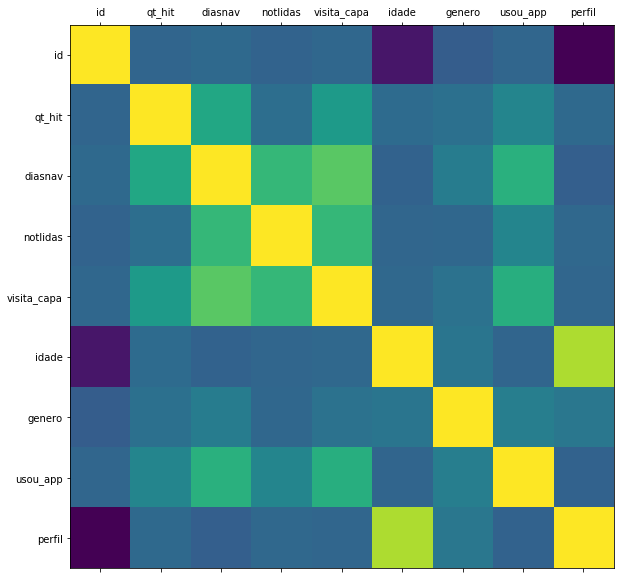

In [29]:
# Criando o gráfico
plot_corr(df3)

In [30]:
# Definindo as classes
perfil_map = {True : 1, False : 0}
usou_app_map = {True : 1, False : 0}
genero_map = {True : 1, False : 0}

In [31]:
# Aplicando o mapeamento ao dataset
df3['perfil'] = df3['perfil'].map(perfil_map)
df3['usou_app'] = df3['usou_app'].map(usou_app_map)
df3['genero'] = df3['genero'].map(genero_map)

In [32]:
# Verificando como os dados estão distribuídos
num_true = len(df3.loc[df3['perfil'] == True])
num_false = len(df3.loc[df3['perfil'] == False])
print("Número de assinantes: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de não assinantes: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de assinantes: 600 (10.73%)
Número de não assinantes: 4990 (89.27%)


In [33]:
# os números de assinantes não estão muito bem distribuídos

# fatiando o dataset a fim de distrubiuir melhor os dados

In [34]:
df4 = df3.iloc[2000:4000]
df4.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
2004  240976       1        2         0            7   49.0       0         1   
2005  136834       0       60         2          202   49.0       1         0   

           renda  perfil  
2004  não possui       0  
2005  não possui       0

In [35]:
len(df4.loc[df4['perfil'] == 0])

2000

In [36]:
len(df4.loc[df4['perfil'] == 1])

0

In [37]:
df5 = df3.iloc[0:3000]
df5.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1

In [38]:
len(df5.loc[df5['perfil'] == 0])

2400

In [39]:
len(df5.loc[df5['perfil'] == 1])

600

In [40]:
df6 = df3.iloc[0:2000]
df6.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1

In [41]:
len(df6.loc[df6['perfil'] == 0])

1400

In [42]:
len(df6.loc[df6['perfil'] == 1])

600

In [43]:
# Verificando como os dados estão distribuídos
n_true = len(df6.loc[df6['perfil'] == True])
n_false = len(df6.loc[df6['perfil'] == False])
print("Número de assinantes: {0} ({1:2.2f}%)".format(n_true, (n_true/ (n_true + n_false)) * 100))
print("Número de não assinantes: {0} ({1:2.2f}%)".format(n_false, (n_false/ (n_true + n_false)) * 100))

Número de assinantes: 600 (30.00%)
Número de não assinantes: 1400 (70.00%)


# Spliting

## Inserir a imagem do spliting chamadotreinamento

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['qt_hit', 'diasnav', 'notlidas', 'visita_capa', 'idade', 'genero', 'usou_app', 'perfil']

In [46]:
# Variável a ser prevista
atrib_prev = ['perfil']

In [47]:
# Criando objetos
X = df6[atributos].values
Y = df6[atrib_prev].values

In [51]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1., 23.,  0., ...,  1.,  1.,  1.],
       [ 5., 16., 11., ...,  1.,  0.,  1.],
       ...,
       [12., 13., 41., ...,  1.,  0.,  0.],
       [ 0.,  2.,  0., ...,  1.,  1.,  0.],
       [ 0.,  2.,  0., ...,  1.,  0.,  0.]])

In [52]:
Y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [53]:
# Definindo a taxa de split
split_test_size = 0.30

In [54]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [55]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df6.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df6.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [56]:
X_treino

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 5., 16., 12., ...,  1.,  1.,  0.],
       [ 0.,  1.,  1., ...,  1.,  0.,  0.],
       [ 0.,  3.,  1., ...,  1.,  0.,  0.]])

# Verificando o split

In [57]:
print("Original True : {0} ({1:0.2f}%)".format(len(df6.loc[df6['perfil'] == 1]), 
                                               (len(df6.loc[df6['perfil'] ==1])/len(df6.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df6.loc[df6['perfil'] == 0]), 
                                               (len(df6.loc[df6['perfil'] == 0])/len(df6.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 600 (30.00%)
Original False : 1400 (70.00%)

Training True : 407 (29.07%)
Training False : 993 (70.93%)

Test True : 193 (32.17%)
Test False : 407 (67.83%)


# Valores Missing ocultos

In [58]:
df6.isnull().values.any()

False

In [59]:
df6.head()

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   
2  1630       5       16        11            4  119.0       1         0   
3   905       9       13         8           25  119.0       0         1   
4  1219       1        1         0            9   42.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1  
2      não possui       1  
3   ACIMA DE 25SM       1  
4  DE 4SM ATE 8SM       1

In [60]:
# O zero não é um valor missing.
# Será que o zero representa uma informação correta sobre as variáveis?
# No caso dos atributos sobre qt_hit, diasnav, notlidas, visita_capa, o zero não tornaria os
# dados tendenciosos.

# Atenção com os valores zero e um em genero e usou_app

In [61]:
# Verificar a quantidade de valores zero que há no dataset


In [62]:
# Na análise exploratória do dataset, verificou-se que a moda de valores sobre os atributos
# destacados antariormente. Assim, optou-se por substituir pela média.

# Valores Missing Ocultos

## Dataset fsem filtro (bruto)

In [63]:
# Verificando se existem valores nulos
df6.isnull().values.any()

False

In [64]:
df6.head(5)

id  qt_hit  diasnav  notlidas  visita_capa  idade  genero  usou_app  \
0  3321       0        0         0            0   38.0       0         0   
1  1459       1       23         0          362  119.0       1         1   
2  1630       5       16        11            4  119.0       1         0   
3   905       9       13         8           25  119.0       0         1   
4  1219       1        1         0            9   42.0       1         1   

            renda  perfil  
0  DE 4SM ATE 8SM       1  
1  DE 3SM ATE 4SM       1  
2      não possui       1  
3   ACIMA DE 25SM       1  
4  DE 4SM ATE 8SM       1

In [65]:
print("# Linhas no dataframe {0}".format(len(df6)))
print("# Linhas missing qt_hit: {0}".format(len(df6.loc[df6['qt_hit'] == 0])))
print("# Linhas missing diasnav: {0}".format(len(df6.loc[df6['diasnav'] == 0])))
print("# Linhas missing notlidas: {0}".format(len(df6.loc[df6['notlidas'] == 0])))
print("# Linhas missing visita_capa: {0}".format(len(df6.loc[df6['visita_capa'] == 0])))
print("# Linhas missing idade: {0}".format(len(df6.loc[df6['idade'] == 0])))

# Linhas no dataframe 2000
# Linhas missing qt_hit: 1247
# Linhas missing diasnav: 307
# Linhas missing notlidas: 657
# Linhas missing visita_capa: 1247
# Linhas missing idade: 0


## Tratando Dados Missing - Impute 
Substituindo os valores iguais a zero, pela média dos dados

In [66]:
from sklearn.preprocessing import Imputer

In [67]:
# Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Substituindo os valores iguais a zero, pela média dos dados
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [68]:
X_treino

array([[19.41977612,  1.        , 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612, 13.31787521, 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612, 13.31787521, 27.42963753, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 5.        , 16.        , 12.        , ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [19.41977612,  3.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

# Contruindo e treinando o modelo

In [69]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [70]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [71]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None)

# Verificando a exatidão no modelo nos dados de treino

In [72]:
from sklearn import metrics

In [73]:
nb_predict_train = modelo_v1.predict(X_treino)

In [74]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.9400



# Verificando a exatidão no modelo nos dados de teste

In [75]:
nb_predict_test = modelo_v1.predict(X_teste)

In [76]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.9317



# Métricas

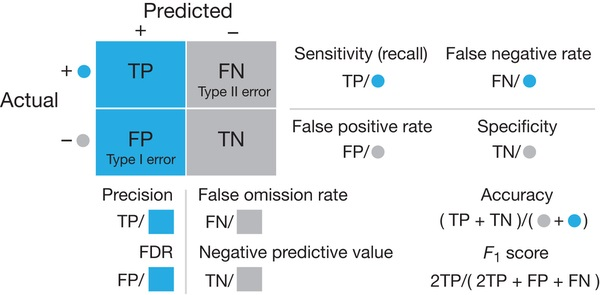

In [77]:
from IPython.display import Image
Image('ConfusionMatrix.jpg')

In [78]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[166  27]
 [ 14 393]]

Classification Report
             precision    recall  f1-score   support

          1       0.92      0.86      0.89       193
          0       0.94      0.97      0.95       407

avg / total       0.93      0.93      0.93       600



In [79]:
# Será que podemos melhorar o algoritmo?

# Testando outro algoritmo

In [80]:
# conjunto de árvorede decisão = random forest

# Otimizando o modelo com RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [83]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Exatidão (Accuracy): 0.9936


In [84]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

Exatidão (Accuracy): 0.9383



In [85]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[161  32]
 [  5 402]]

Classification Report
             precision    recall  f1-score   support

          1       0.97      0.83      0.90       193
          0       0.93      0.99      0.96       407

avg / total       0.94      0.94      0.94       600



# Testando outro algoritmo

In [86]:
# Regressão logística
# é um algoritmo de classificação diferente de regressão linear simples

# Regressão Logística

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [89]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.9400

Classification Report
             precision    recall  f1-score   support

          1       0.95      0.85      0.90       193
          0       0.93      0.98      0.96       407

avg / total       0.94      0.94      0.94       600



In [90]:
### Resumindo
## Exatidão nos dados de teste

# Modelo usando algoritmo Naive Bayes         = 0.93
# Modelo usando algoritmo Random Forest       = 0.94
# Modelo usando algoritmo Regressão Logística = 0.94

In [91]:
## Escolheu-se a regressão logística para realizar previsões

# Fazendo previsões com o modelo treinado

In [92]:
import pickle

In [93]:
# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [94]:
X_teste

array([[17.26728111,  2.        ,  3.        , ...,  1.        ,
         1.        ,  1.        ],
       [17.26728111, 13.78500986, 29.82962963, ...,  1.        ,
         1.        ,  1.        ],
       [17.26728111,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 2.        , 22.        , 33.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 4.        ,  9.        , 12.        , ...,  1.        ,
         1.        ,  1.        ],
       [67.        , 60.        , 29.82962963, ...,  1.        ,
         1.        ,  1.        ]])

In [95]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[1]
[0]


# Modelo preditivo - genero, usou_app e perfil = True or False

## Dataset filtrado

In [219]:
df10 = df1
df10.shape

(5600, 10)

In [232]:
df10[df10['idade'].isnull()]

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
877   168369       0       33       104            0    NaN      F      NAO   
1101   23046       0        3         8            0    NaN      F      NAO   
1317  108761       0       56       328          389    NaN      M      SIM   
1563  183562       0        1         0            5    NaN      M      SIM   
2087  111528       0        1         0            0    NaN      M      NAO   
3419   80176       0       24         7            0    NaN      F      NAO   
4120  194220       0       37       178           62    NaN      M      NAO   
4406  183390       0        4         3            0    NaN      M      NAO   
4737  161324       0       20        41           79    NaN      M      SIM   
4951  187037       8       12        20            0    NaN      M      NAO   

                renda     perfil  
877   DE 8SM ATE 14SM  PROSPECT   
1101       não possui  PROSPECT   
1317   DE 4SM ATE 8SM  PROSPECT   
1563   DE 4SM ATE 8SM  PROSPECT   
2087       não possui  PROSPECT   
3419   DE 3SM ATE 4SM  PROSPECT   
4120       não possui  PROSPECT   
4406   DE 3SM ATE 4SM  PROSPECT   
4737   DE 4SM ATE 8SM  PROSPECT   
4951   DE 3SM ATE 4SM  PROSPECT

In [235]:
df11 = df10.fillna({'idade': 0})

In [237]:
df11.isnull().values.any()

False

In [238]:
df11.shape

(5600, 10)

In [239]:
df11.head()

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   
2  1630       5       16        11            4  119.0      M      NAO   
3   905       9       13         8           25  119.0      F      SIM   
4  1219       1        1         0            9   42.0      M      SIM   

            renda     perfil  
0  DE 4SM ATE 8SM  ASSINANTE  
1  DE 3SM ATE 4SM  ASSINANTE  
2      não possui  ASSINANTE  
3   ACIMA DE 25SM  ASSINANTE  
4  DE 4SM ATE 8SM  ASSINANTE

In [240]:
# Trannsformando a coluna perfil em booleano
p = {'ASSINANTE': True, 'PROSPECT': False}

In [241]:
df11['perfil'] = df11['perfil'].map(p)

In [244]:
df11.isnull().values.any()

True

In [247]:
df12 = df11.fillna({'perfil': False})

In [248]:
df12.shape

(5600, 10)

In [250]:
df12.isnull().values.any()

False

In [251]:
df12.head(2)

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
0  3321       0        0         0            0   38.0      F      NAO   
1  1459       1       23         0          362  119.0      M      SIM   

            renda  perfil  
0  DE 4SM ATE 8SM    True  
1  DE 3SM ATE 4SM    True

In [253]:
df12[df12['idade'] < 18]

id  qt_hit  diasnav  notlidas  visita_capa  idade genero usou_app  \
288     3390       0        0         0            0   12.0      M      NAO   
877   168369       0       33       104            0    0.0      F      NAO   
1101   23046       0        3         8            0    0.0      F      NAO   
1317  108761       0       56       328          389    0.0      M      SIM   
1563  183562       0        1         0            5    0.0      M      SIM   
1959  115944      20       41        36          132    8.0      M      SIM   
2087  111528       0        1         0            0    0.0      M      NAO   
3005  224318       0       19        23            5   15.0      F      SIM   
3419   80176       0       24         7            0    0.0      F      NAO   
4120  194220       0       37       178           62    0.0      M      NAO   
4406  183390       0        4         3            0    0.0      M      NAO   
4737  161324       0       20        41           79    0.0      M      SIM   
4951  187037       8       12        20            0    0.0      M      NAO   
5366  286385       0       12         7            0   14.0      M      NAO   
5532  272057       0        3         3            0  -19.0      F      NAO   

                 renda  perfil  
288         não possui    True  
877    DE 8SM ATE 14SM   False  
1101        não possui   False  
1317    DE 4SM ATE 8SM   False  
1563    DE 4SM ATE 8SM   False  
1959        não possui   False  
2087        não possui   False  
3005    DE 3SM ATE 4SM   False  
3419    DE 3SM ATE 4SM   False  
4120        não possui   False  
4406    DE 3SM ATE 4SM   False  
4737    DE 4SM ATE 8SM   False  
4951    DE 3SM ATE 4SM   False  
5366        não possui   False  
5532  DE 14SM ATE 25SM   False

In [265]:
df12[df12['idade'] > 100].count()

id             556
qt_hit         556
diasnav        556
notlidas       556
visita_capa    556
idade          556
genero         556
usou_app       556
renda          556
perfil         556
dtype: int64

In [270]:
df13 = df12[(df12['idade'] > 18) & (df12['idade'] < 100)]

In [271]:
df13.shape

(5028, 10)

In [272]:
len(df13.loc[df13['perfil'] == True])

88

In [273]:
len(df13.loc[df13['perfil'] == False])

4940

# Verificando a correlação entre os atributos

## Dataset filtrado

In [274]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa
df13.corr()

id    qt_hit   diasnav  notlidas  visita_capa     idade  \
id           1.000000  0.004051  0.001443 -0.014344     0.008686  0.021035   
qt_hit       0.004051  1.000000  0.388475  0.030716     0.304910  0.024269   
diasnav      0.001443  0.388475  1.000000  0.498112     0.617039  0.016166   
notlidas    -0.014344  0.030716  0.498112  1.000000     0.498644 -0.009484   
visita_capa  0.008686  0.304910  0.617039  0.498644     1.000000  0.030587   
idade        0.021035  0.024269  0.016166 -0.009484     0.030587  1.000000   
perfil      -0.220215  0.012570 -0.007940  0.020045     0.001234 -0.069708   

               perfil  
id          -0.220215  
qt_hit       0.012570  
diasnav     -0.007940  
notlidas     0.020045  
visita_capa  0.001234  
idade       -0.069708  
perfil       1.000000

In [275]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df13, size=10):
    corr = df13.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

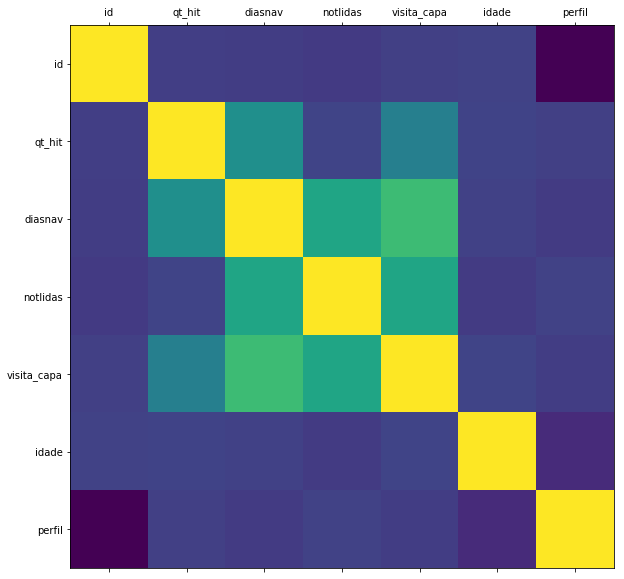

In [276]:
# Criando o gráfico
plot_corr(df13)

In [277]:
# Definindo as classes
perf_map = {True : 1, False : 0}
#usou_app_map = {True : 1, False : 0}
#genero_map = {True : 1, False : 0}

In [278]:
# Aplicando o mapeamento ao dataset
df13['perfil'] = df3['perfil'].map(perf_map)
#df3['usou_app'] = df3['usou_app'].map(usou_app_map)
#df3['genero'] = df3['genero'].map(genero_map)

C:\Users\Resende\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [279]:
# Verificando como os dados estão distribuídos
num13_true = len(df13.loc[df13['perfil'] == True])
num13_false = len(df13.loc[df13['perfil'] == False])
print("Número de assinantes: {0} ({1:2.2f}%)".format(num13_true, (num13_true/ (num13_true + num13_false)) * 100))
print("Número de não assinantes: {0} ({1:2.2f}%)".format(num13_false, (num13_false/ (num13_true + num13_false)) * 100))

Número de assinantes: 88 (1.75%)
Número de não assinantes: 4940 (98.25%)


# Spliting (dataset filtrado)

In [288]:
#Achoq que deve ser 98% para treino e 2% para teste

In [281]:
#from sklearn.model_selection import train_test_split

In [304]:
# Seleção de variáveis preditoras (Feature Selection)
atributos13 = ['qt_hit', 'diasnav', 'notlidas', 'visita_capa', 'idade', 'perfil']

In [305]:
# Variável a ser prevista
atrib_prev13 = ['perfil']

In [306]:
# Criando objetos
X13 = df13[atributos13].values
Y13 = df13[atrib_prev13].values

In [307]:
X13

array([[0, 0, 0, ..., 'F', 'NAO', 1],
       [1, 1, 0, ..., 'M', 'SIM', 1],
       [1, 6, 3, ..., 'M', 'NAO', 1],
       ...,
       [0, 1, 1, ..., 'F', 'NAO', 0],
       [0, 1, 1, ..., 'F', 'NAO', 0],
       [25, 18, 34, ..., 'F', 'NAO', 0]], dtype=object)

In [309]:
Y13

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

# Definindo a taxa de split
split_test_size = 0.02

In [310]:
# Criando dados de treino e de teste
X_treino13, X_teste13, Y_treino13, Y_teste13 = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [311]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino13)/len(df13.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste13)/len(df13.index)) * 100))

97.99% nos dados de treino
2.01% nos dados de teste


In [312]:
X_treino13

array([[0, 7, 2, ..., 'M', 'NAO', 0],
       [1, 10, 7, ..., 'M', 'NAO', 0],
       [0, 1, 0, ..., 'M', 'NAO', 0],
       ...,
       [0, 3, 1, ..., 'M', 'NAO', 0],
       [1, 3, 3, ..., 'F', 'NAO', 0],
       [1, 45, 50, ..., 'M', 'SIM', 0]], dtype=object)

In [313]:
print("Original True : {0} ({1:0.2f}%)".format(len(df13.loc[df13['perfil'] == 1]), 
                                               (len(df13.loc[df13['perfil'] ==1])/len(df13.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df13.loc[df13['perfil'] == 0]), 
                                               (len(df13.loc[df13['perfil'] == 0])/len(df13.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino13[Y_treino13[:] == 1]), 
                                               (len(Y_treino13[Y_treino13[:] == 1])/len(Y_treino13) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino13[Y_treino13[:] == 0]), 
                                               (len(Y_treino13[Y_treino13[:] == 0])/len(Y_treino13) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste13[Y_teste13[:] == 1]), 
                                               (len(Y_teste13[Y_teste13[:] == 1])/len(Y_teste13) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste13[Y_teste13[:] == 0]), 
                                               (len(Y_teste13[Y_teste13[:] == 0])/len(Y_teste13) * 100)))

Original True : 88 (1.75%)
Original False : 4940 (98.25%)

Training True : 83 (1.68%)
Training False : 4844 (98.32%)

Test True : 5 (4.95%)
Test False : 96 (95.05%)


# Valores Missing Ocultos

## Dataset filtrado

In [ ]:
# Verificando se existem valores nulos
df13.isnull().values.any()

In [ ]:
df.head(5)

In [ ]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

## Tratando Dados Missing - Impute 
Substituindo os valores iguais a zero, pela média dos dados

In [ ]:
#from sklearn.preprocessing import Imputer

In [ ]:
# Criando objeto
preenche_0 = Imputer(missing_values = 0, strategy = "mean", axis = 0)

# Substituindo os valores iguais a zero, pela média dos dados
X_treino13 = preenche_0.fit_transform(X_treino13)
X_teste13 = preenche_0.fit_transform(X_teste13)

In [ ]:
X_treino13